<a href="https://colab.research.google.com/github/nafiul-araf/Anomaly-Detection/blob/main/Auto_Encoder_for_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***References:*** https://www.tensorflow.org/tutorials/generative/autoencoder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

###Basic Auto Encoder

In [2]:
(x_train, _), (x_test, _)=fashion_mnist.load_data()

x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
(x_train.shape, x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [3]:
class Basicautoencoder(Model):
  def __init__(self, latent_dim):
    super(Basicautoencoder, self).__init__()
    self.latent_dim=latent_dim
    self.encoder=tf.keras.Sequential([
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(64, activation='relu'),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(latent_dim, activation='relu')
    ])
    self.decoder=tf.keras.Sequential([
                                      tf.keras.layers.Dense(784, activation='sigmoid'),
                                      tf.keras.layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)

    return decoded

basic_encoder=Basicautoencoder(latent_dim=32)

In [4]:
basic_encoder

In [5]:
basic_encoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

basic_encoder.fit(x_train, x_train, epochs=15, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/15
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0237 - val_loss: 0.0157
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0146 - val_loss: 0.0139
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0137 - val_loss: 0.0136
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0134 - val_loss: 0.0134
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0131 - val_loss: 0.0131
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0130 - val_loss: 0.0130
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0128 - val_loss: 0.0129
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0127 - val_loss: 0.0129
Epoch 9/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0126 - val_loss: 0.0127
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [6]:
encoded_imgs=basic_encoder.encoder(x_test).numpy()
decoded_imgs=basic_encoder.decoder(encoded_imgs).numpy()

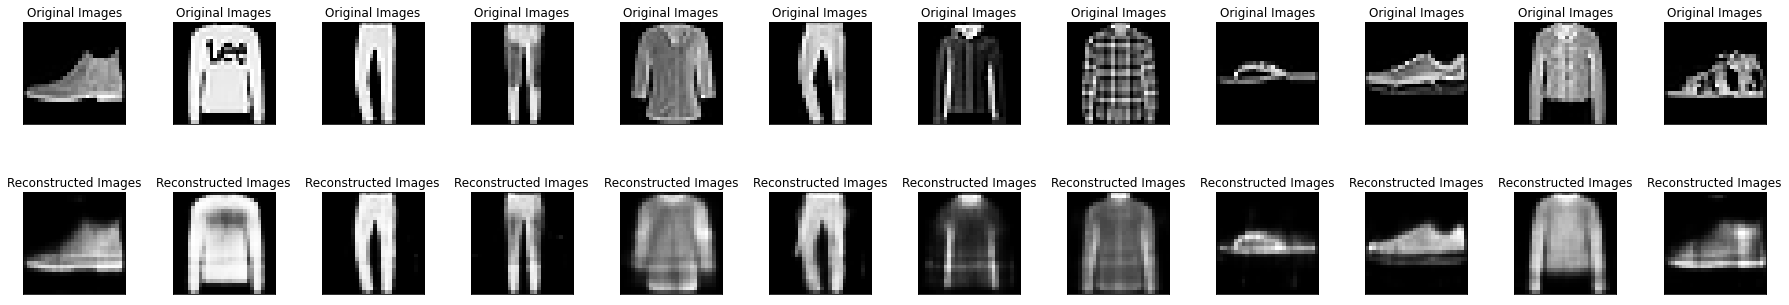

In [7]:
n=12
plt.figure(figsize=(25, 5))
for i in range(n):
  ax=plt.subplot(2, n, i+1)
  plt.imshow(x_test[i])
  plt.title('Original Images')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax=plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i])
  plt.title('Reconstructed Images')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

###Auto Encoder for Denoising

In [8]:
(x_train, _), (x_test, _)=fashion_mnist.load_data()

x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
print('Shape before add new axis', (x_train.shape, x_test.shape))

x_train=x_train[..., tf.newaxis]
x_test=x_test[..., tf.newaxis]
print('Shape after add new axis', (x_train.shape, x_test.shape))

Shape before add new axis ((60000, 28, 28), (10000, 28, 28))
Shape after add new axis ((60000, 28, 28, 1), (10000, 28, 28, 1))


In [9]:
noise_factor=0.2

x_train_noisy=x_train+noise_factor*tf.random.normal(x_train.shape)
x_test_noisy=x_test+noise_factor*tf.random.normal(x_test.shape)

x_train_noisy=tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy=tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

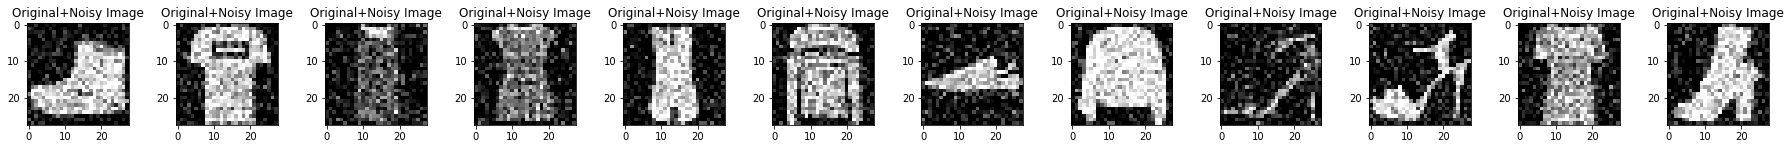

In [10]:
n=12
plt.figure(figsize=(25, 5))
for i in range(n):
  plt.subplot(1, n, i+1)
  plt.imshow(tf.squeeze(x_train_noisy[i]))
  plt.title('Original+Noisy Image')
  plt.gray()
plt.tight_layout()
plt.show()

In [11]:
class AutoencoderDenoise(Model):
  def __init__(self):
    super(AutoencoderDenoise, self).__init__()
    self.encoder=tf.keras.Sequential([
                                      tf.keras.layers.Input(shape=(28, 28, 1)),
                                      tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
                                      tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
                                      tf.keras.layers.Conv2D(8, (3, 3,), padding='same', activation='relu')
    ])
    self.decoder=tf.keras.Sequential([
                                      tf.keras.layers.Conv2DTranspose(8, (3, 3), padding='same', activation='relu'),
                                      tf.keras.layers.Conv2DTranspose(16, (3, 3), padding='same', activation='relu'),
                                      tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='same', activation='relu'),
                                      tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')
    ])
  
  def call(self, x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)

    return decoded


autoencoder_denoise=AutoencoderDenoise()

autoencoder_denoise.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [12]:
autoencoder_denoise.fit(x_train_noisy, x_train, epochs=10, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 31s 12ms/step - loss: 0.0081 - val_loss: 0.0056
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 10/10
1875/1875 [==============================] - 21s 11m

In [13]:
print('Model Summary', autoencoder_denoise.summary())
print('\n')
print('Encoder Summary', autoencoder_denoise.encoder.summary())
print('\n')
print('Decoder Summary', autoencoder_denoise.decoder.summary())

Model: "autoencoder_denoise"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 28, 28, 8)         6104      
                                                                 
 sequential_3 (Sequential)   (None, 28, 28, 1)         6681      
                                                                 
Total params: 12,785
Trainable params: 12,785
Non-trainable params: 0
_________________________________________________________________
Model Summary None


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 


In [14]:
encoded_imgs=autoencoder_denoise.encoder(x_test).numpy()
decoded_imgs=autoencoder_denoise.decoder(encoded_imgs).numpy()

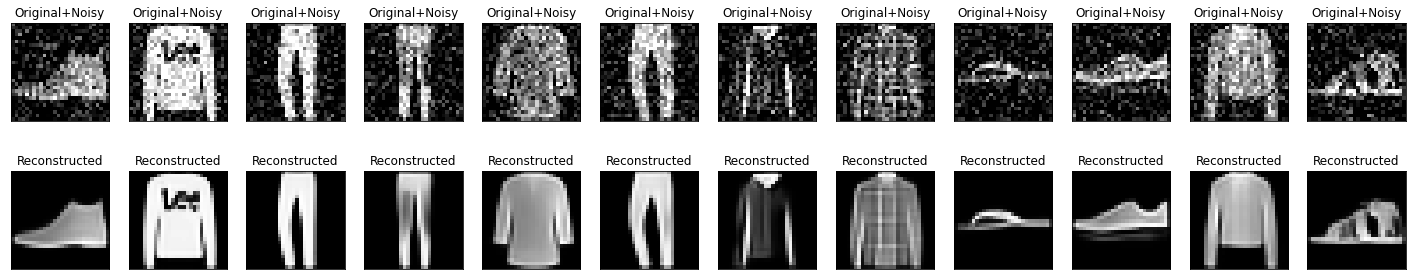

In [15]:
n=12
plt.figure(figsize=(25, 5))
for i in range(n):
  ax=plt.subplot(2, n, i+1)
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.title('Original+Noisy')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  bx=plt.subplot(2, n, i+1+n)
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  plt.title('Reconstructed')
  plt.gray()
  bx.get_xaxis().set_visible(False)
  bx.get_yaxis().set_visible(False)

###Auto Encoder for Anomaly Detection

In [16]:
df=pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

In [17]:
raw_data=df.values

data=raw_data[:, :-1]
labels=raw_data[:, -1]

train_data, test_data, train_labels, test_labels=train_test_split(data, labels, test_size=.25, random_state=np.random.seed(20))

In [18]:
train_data=(train_data-tf.reduce_min(train_data))/(tf.reduce_max(train_data)-tf.reduce_min(train_data))
test_data=(test_data-tf.reduce_min(test_data))/(tf.reduce_max(test_data)-tf.reduce_min(test_data))

train_data=tf.cast(train_data, tf.float32)
test_data=tf.cast(test_data, tf.float32)

In [19]:
train_labels

array([1., 1., 1., ..., 1., 0., 1.])

In [20]:
train_labels=train_labels.astype(bool)
test_labels=test_labels.astype(bool)

normal_train_data=train_data[train_labels]
normal_test_data=test_data[test_labels]

anomalous_train_data=train_data[~train_labels]
anomalous_test_data=test_data[~test_labels]

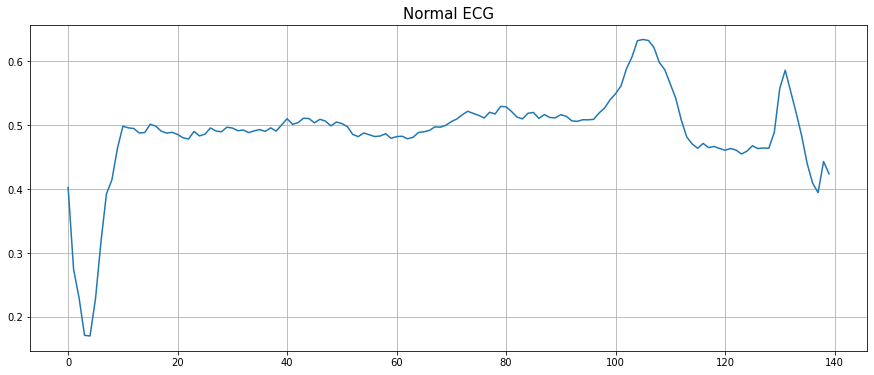

In [21]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.plot(np.arange(140), normal_train_data[10])
plt.title('Normal ECG', fontsize=15)
plt.show()

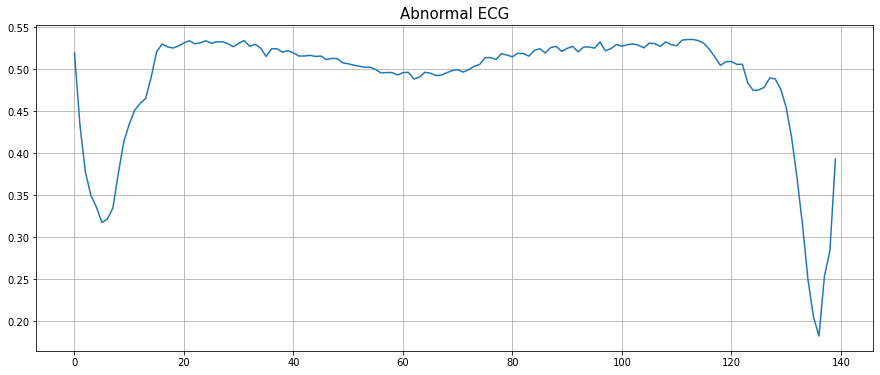

In [22]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[10])
plt.title('Abnormal ECG', fontsize=15)
plt.show()

In [23]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder=tf.keras.Sequential([
                                      tf.keras.layers.Dense(32, activation='relu'),
                                      tf.keras.layers.Dense(16, activation='relu'),
                                      tf.keras.layers.Dense(8, activation='relu')
    ])
    self.decoder=tf.keras.Sequential([
                                      tf.keras.layers.Dense(16, activation='relu'),
                                      tf.keras.layers.Dense(32, activation='relu'),
                                      tf.keras.layers.Dense(140, activation='sigmoid')
    ])

  def call(self, x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)

    return decoded

anomaly_detection=AnomalyDetector()
anomaly_detection.compile(optimizer='adam', loss='mae')

In [24]:
history=anomaly_detection.fit(normal_train_data, normal_train_data, epochs=20, batch_size=256, validation_data=(test_data, test_data), shuffle=True)

Epoch 1/20
9/9 [==============================] - 1s 27ms/step - loss: 0.0445 - val_loss: 0.0816
Epoch 2/20
9/9 [==============================] - 0s 9ms/step - loss: 0.0400 - val_loss: 0.0810
Epoch 3/20
9/9 [==============================] - 0s 8ms/step - loss: 0.0353 - val_loss: 0.0809
Epoch 4/20
9/9 [==============================] - 0s 8ms/step - loss: 0.0315 - val_loss: 0.0807
Epoch 5/20
9/9 [==============================] - 0s 8ms/step - loss: 0.0281 - val_loss: 0.0796
Epoch 6/20
9/9 [==============================] - 0s 9ms/step - loss: 0.0255 - val_loss: 0.0782
Epoch 7/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0237 - val_loss: 0.0771
Epoch 8/20
9/9 [==============================] - 0s 9ms/step - loss: 0.0223 - val_loss: 0.0761
Epoch 9/20
9/9 [==============================] - 0s 8ms/step - loss: 0.0213 - val_loss: 0.0758
Epoch 10/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0205 - val_loss: 0.0756
Epoch 11/20
9/9 [===================

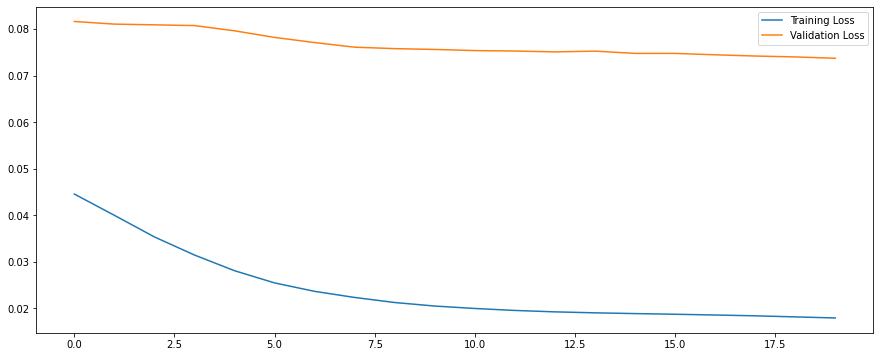

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

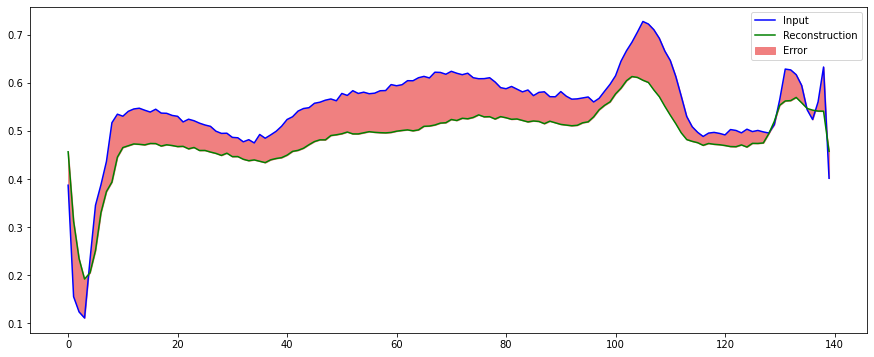

In [26]:
encoded_data=anomaly_detection.encoder(normal_test_data).numpy()
decoded_data=anomaly_detection.decoder(encoded_data).numpy()

plt.figure(figsize=(15, 6))
plt.plot(normal_test_data[10], 'b')
plt.plot(decoded_data[10], 'g')
plt.fill_between(np.arange(140), decoded_data[10], normal_test_data[10], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

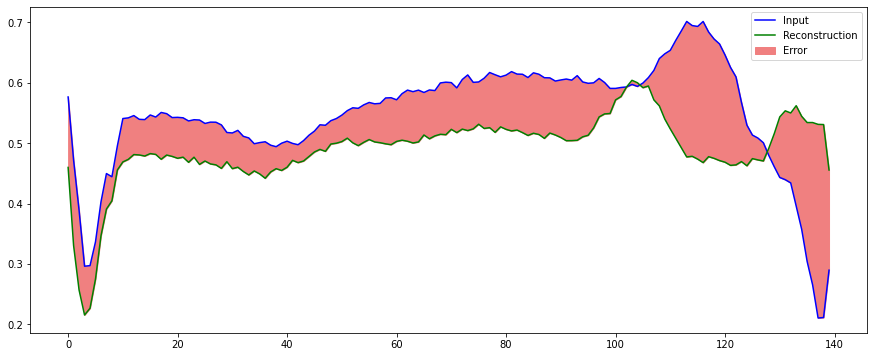

In [27]:
encoded_data=anomaly_detection.encoder(anomalous_test_data).numpy()
decoded_data=anomaly_detection.decoder(encoded_data).numpy()

plt.figure(figsize=(15, 6))
plt.plot(anomalous_test_data[10], 'b')
plt.plot(decoded_data[10], 'g')
plt.fill_between(np.arange(140), decoded_data[10], anomalous_test_data[10], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

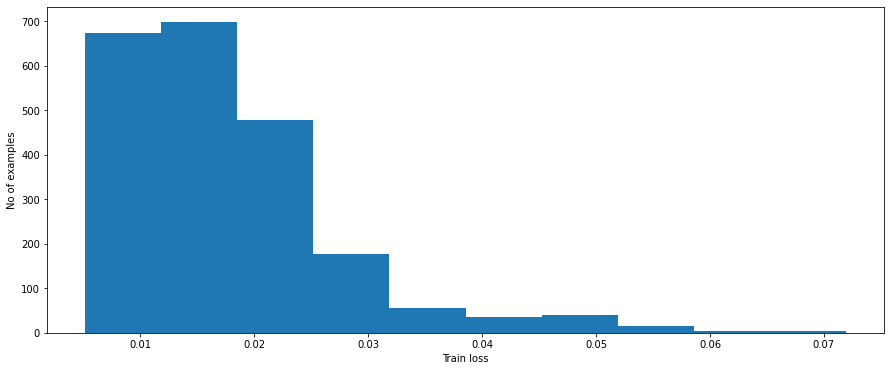

In [28]:
reconstruction=anomaly_detection.predict(normal_train_data)
train_loss=tf.keras.losses.mae(reconstruction, normal_train_data)

plt.figure(figsize=(15, 6))
plt.hist(train_loss[None, :], bins=10)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [29]:
threshold=np.mean(train_loss)+np.std(train_loss)
print('Threshold for Normal ECG: %.3f'%threshold)

Threshold for Normal ECG: 0.027


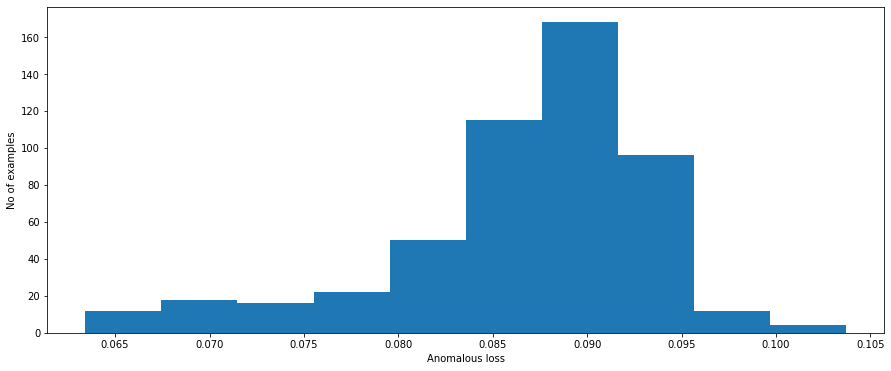

In [30]:
reconstruction_new=anomaly_detection.predict(anomalous_test_data)
anomalous_test_loss=tf.keras.losses.mae(reconstruction_new, anomalous_test_data)

plt.figure(figsize=(15, 6))
plt.hist(anomalous_test_loss[None, :], bins=10)
plt.xlabel("Anomalous loss")
plt.ylabel("No of examples")
plt.show()

In [31]:
def prediction(model, data, threshold):
  reconstructions=model(data)
  loss=tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def performance_metrics(predictions, labels):
  print("Accuracy: {}".format(accuracy_score(labels, predictions)))
  print("Precision: {}".format(precision_score(labels, predictions)))
  print("Recall: {}".format(recall_score(labels, predictions)))

In [32]:
preds=prediction(anomaly_detection, test_data, threshold)
performance_metrics(preds, test_labels)

Accuracy: 0.4104
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
